In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Data Exploring

In [69]:
df=pd.read_csv(r"C:\Users\mohamed\Downloads\Unemployment_Rate_upto_11_2020.csv")

In [70]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [71]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [102]:
df.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
Month                                  0
Year                                   0
dtype: int64

# Data Wrangling

In [74]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [75]:
df['Frequency']= df['Frequency'].astype('category')


In [80]:
# Dropping the original 'Month' column
df['Month']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year

In [104]:
df.tail()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month,Year
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,June,2020
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,July,2020
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,August,2020
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,September,2020
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855,October,2020


# EDA

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate,267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01
Year,267.0,2.020000e+03,0.000000e+00,2020.0000,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03


In [95]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    # sum['value_counts']=train.value_counts()
    # sum['skew'] = train.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='YlOrRd')

,dtypes,missing#,missing%,uniques,count,min,max,mean
States,object,0,0.000000,27,267,nan,nan,nan
Date,datetime64[ns],0,0.000000,10,267,nan,nan,nan
Frequency,category,0,0.000000,1,267,nan,nan,nan
Estimated Unemployment Rate,float64,0,0.000000,252,267,0.500000,75.850000,12.236929
Estimated Employed,int64,0,0.000000,267,267,117542.000000,59433759.000000,13962105.722846
Estimated Labour Participation Rate,float64,0,0.000000,248,267,16.770000,69.690000,41.681573
Region,object,0,0.000000,5,267,nan,nan,nan
longitude,float64,0,0.000000,27,267,10.850500,33.778200,22.826048
latitude,float64,0,0.000000,24,267,71.192400,92.937600,80.532425
Month,object,0,0.000000,10,267,nan,nan,nan


In [96]:
df.corr()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,Year
Estimated Unemployment Rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976,NaN
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321,NaN
Estimated Labour Participation Rate,-0.073540,-0.047948,1.000000,0.080372,0.397836,NaN
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895,NaN
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN


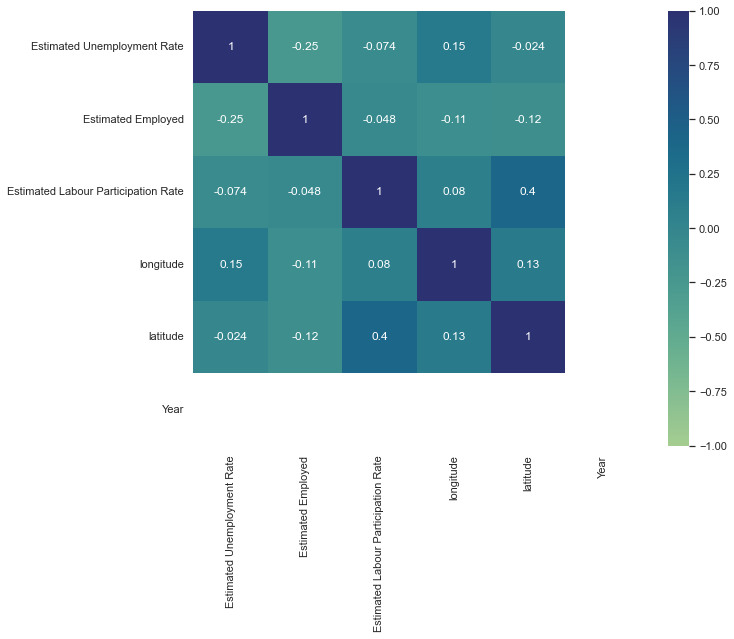

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="crest")
plt.show()

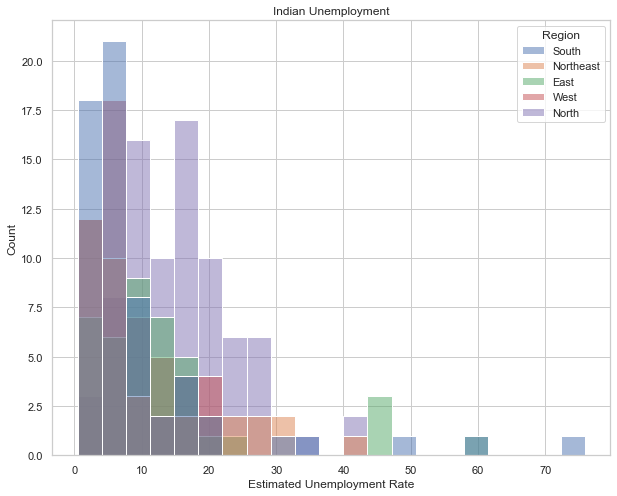

In [98]:
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

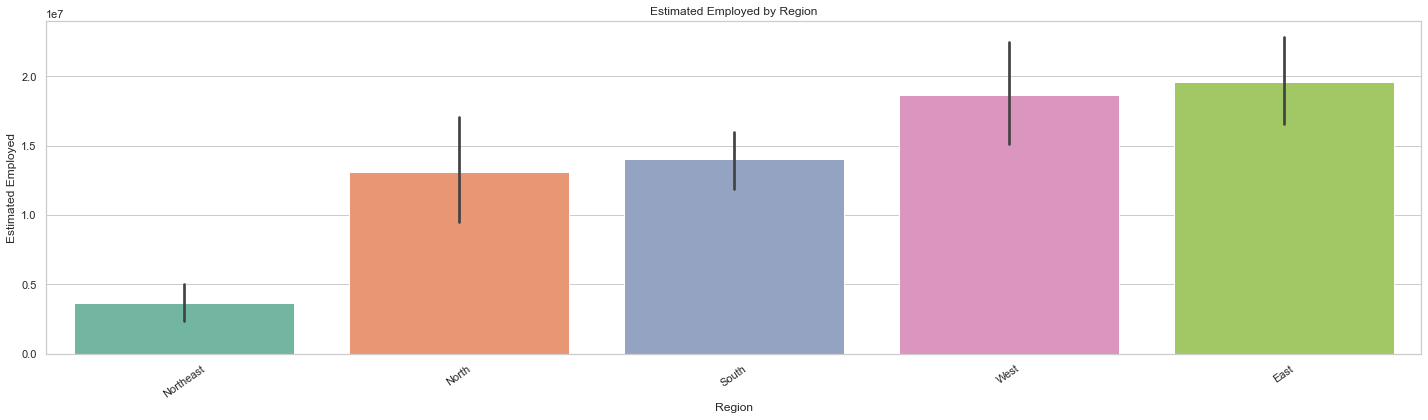

In [99]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=35)
sns.barplot(data=df, x='Region', y='Estimated Employed',palette='Set2',order=df.groupby('Region')['Estimated Employed'].mean().sort_values().index)  
plt.title('Estimated Employed by Region') 
plt.tight_layout()

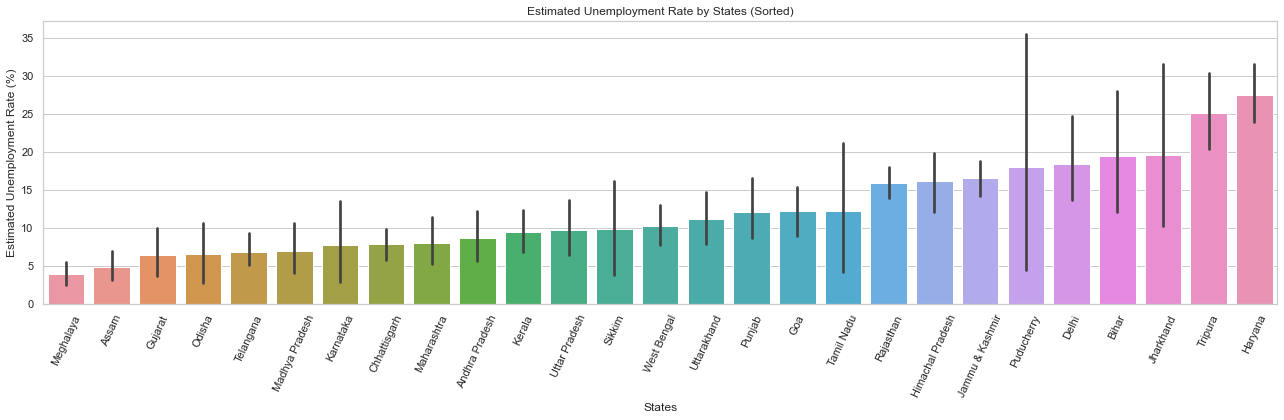

In [100]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x='States', y='Estimated Unemployment Rate', order=df.groupby('States')['Estimated Unemployment Rate'].mean().sort_values().index)
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by States (Sorted)')
plt.xticks(rotation=65)  
plt.tight_layout()
plt.show()
